In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
import pandas as pd
import numpy as np
import tweepy
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import re

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
# Authentication
consumer_key = "oYiJRI9EDdUTXdK7gtjGHIUbY"
consumer_secret = "qL6BGUq3EPXkLMTS0XWiUvDrLQb5S6ISKuWzeSBgADalUCSrTr"
#accessToken = "1543856420185161728-w3tLGDH6pCuPf3heoBI8k42SOYU0w4"
#accessTokenSecret = "yKcz3LIdwPWbOg4fssaYOTiNaEGhCY419sVUAH5HJjk66"

In [20]:
callback_uri = 'oob'

In [24]:
# to authenticate the application
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri) 
redirect_url = auth.get_authorization_url()
print(redirect_url)
#auth.set_access_token(accessToken, accessTokenSecret)
# api = tweepy.API(auth)

https://api.twitter.com/oauth/authorize?oauth_token=t-xlIAAAAAABecqyAAABgciTieo


In [26]:
import webbrowser
webbrowser.open(redirect_url)

False

In [29]:
user_pin_input = input("What's the pin value? ")

What's the pin value? 2206350


In [30]:
auth.get_access_token(user_pin_input)

('1543856420185161728-w3tLGDH6pCuPf3heoBI8k42SOYU0w4',
 'yKcz3LIdwPWbOg4fssaYOTiNaEGhCY419sVUAH5HJjk66')

In [31]:
print(auth.access_token, auth.access_token_secret)

1543856420185161728-w3tLGDH6pCuPf3heoBI8k42SOYU0w4 yKcz3LIdwPWbOg4fssaYOTiNaEGhCY419sVUAH5HJjk66


In [32]:
api = tweepy.API(auth)

In [37]:
me = api.me()

In [39]:
print(me.screen_name)

r_andreoni0


In [49]:
tweets = tweepy.Cursor(api.search, q='lockdown').items(5)

In [50]:
for i in tweets:
  print(i.text)

RT @ssppuudd1954: Can anyone find any mention anywhere in the media of Starmer's Durham lockdown drinks party? Anyone? Sounds like an injun…
RT @AoxiPRNew: https://t.co/2hjPrGfx9B
RT @WuWu75115054: @songpinganq Lockdown ( for weeks to months )in China 🇨🇳 means  you may starve to death, so these people crawling under t…
RT @Hiroshi64788628: How Did Pithani manage to Find a Key maker During LockDown on Sunday ?

CBI Make SSRJustice Priority
RT @vibione: This photo clicked on July 02 2022. This is the so called Aarey carshed. @Dev_Fadnavis doesn't understand nature. During the l…


In [55]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: lockdown
Please enter how many tweets to analyze: 2500


In [58]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2500
positive number:  592
negative number:  741
neutral number:  1167


In [59]:
tweet_list

,0
0,@AngolaWorldWide Lockdown had us acting atoa😭😭
1,RT @keffals: @ContraPoints it's actually insan...
2,@ProfSpada @thelucyjohnston @GBNEWS @JDaviesPh...
3,"Pyongyang has lifted its lockdown, allowing ci..."
4,RT @ChangJiao4: This is so sad #ZeroCovid #sha...
...,...
2495,RT @ReicherStephen: Covid\nIt's like crossing ...
2496,RT @engenestrmteam: 🎤🎸 ATTENTION ENGENES!\nPUT...
2497,"RT @Bangzz_world: 2020 was so promising okes, ..."
2498,RT @Whitei94123314: Have you interviewed the m...


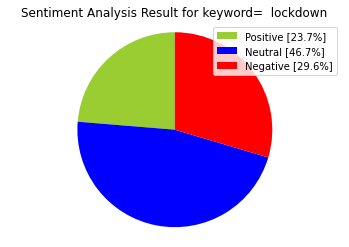

In [61]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [63]:
tweet_list.drop_duplicates(inplace = True)

In [64]:
tweet_list.shape

(1336, 1)

In [68]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,@AngolaWorldWide Lockdown had us acting atoa😭😭,lockdown had us acting atoa
1,RT @keffals: @ContraPoints it's actually insan...,it s actually insane how rates are still hi...
2,@ProfSpada @thelucyjohnston @GBNEWS @JDaviesPh...,big pharma once again benefitting from...
3,"Pyongyang has lifted its lockdown, allowing ci...",pyongyang has lifted its lockdown allowing ci...
4,RT @ChangJiao4: This is so sad #ZeroCovid #sha...,this is so sad zerocovid shanghai chinaloc...
5,Laura and I first met across a zoom room durin...,laura and i first met across a zoom room durin...
6,@GavinNewsom Keep running your mouth about FL ...,keep running your mouth about fl as californ...
7,"RT @Groot66: ""Ungrateful""? That's a pathetic l...",ungrateful that s a pathetic line of argum...
8,RT @Harrison1Ron: There are rumours that Starm...,there are rumours that starmer raynar and foy...
9,RT @CosmopoCon: @thehill Floridians will see t...,floridians will see through the extraordina...


In [69]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@AngolaWorldWide Lockdown had us acting atoa😭😭,lockdown had us acting atoa,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,RT @keffals: @ContraPoints it's actually insan...,it s actually insane how rates are still hi...,-0.375000,0.750000,negative,0.197,0.803,0.000,-0.5647
2,@ProfSpada @thelucyjohnston @GBNEWS @JDaviesPh...,big pharma once again benefitting from...,0.000000,0.100000,positive,0.000,0.674,0.326,0.4404
3,"Pyongyang has lifted its lockdown, allowing ci...",pyongyang has lifted its lockdown allowing ci...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,RT @ChangJiao4: This is so sad #ZeroCovid #sha...,this is so sad zerocovid shanghai chinaloc...,-0.500000,1.000000,negative,0.164,0.741,0.095,-0.4002
5,Laura and I first met across a zoom room durin...,laura and i first met across a zoom room durin...,0.125000,0.500000,neutral,0.000,1.000,0.000,0.0000
6,@GavinNewsom Keep running your mouth about FL ...,keep running your mouth about fl as californ...,0.000000,0.000000,positive,0.084,0.752,0.164,0.4215
7,"RT @Groot66: ""Ungrateful""? That's a pathetic l...",ungrateful that s a pathetic line of argum...,-0.287879,0.708333,negative,0.349,0.531,0.120,-0.7216
8,RT @Harrison1Ron: There are rumours that Starm...,there are rumours that starmer raynar and foy...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
9,RT @CosmopoCon: @thehill Floridians will see t...,floridians will see through the extraordina...,0.466667,1.000000,neutral,0.000,1.000,0.000,0.0000
